# Esercitazione 4

In questa esercitazione vogliamo simulare, attraverso metodi Monte Carlo, il comportamento dipendente dal tempo di un sistema di particelle di Argon in fase solida, liquida o gassosa in un ensemble microcanonico. Vogliamo, quindi, performare una simulazione di Dinamica Molecolare.

### Ensemble Microcanonico

L'ensemble microcanonico è l'insieme statistico di tutti gli stati fisici di sistemi isolati, cioè sistemi che hanno un valore definito e fissato di Energia totale, volume e numero di particelle. Esso si basa su due importanti ipotesi:
1. "Postulato dell'Uguale Probabilità a Priori": quando un sistema isolato è all'equilibrio termodinamico, il suo stato può essere qualunque tra quelli che soddisfano le condizioni macroscopiche del sistema, ognuno con la stessa probabilità;

2. Ergodicita': la media nel tempo di una certa proprietà termodinamica è uguale alla media di tale proprietà su tutti gli elementi dell'insieme.

### Dinamica Molecolare

La dinamica molecolare genera informazioni a livello microscopico fornendoci le posizioni e le velocita' delle particelle e come queste proprieta' cambiano nel tempo a seguito delle condizioni del sistema e delle interazioni tra le particelle. Percio', per calcolare il comportamento microscopico di un sistema, questo tipo di simulazioni richiedono come input una descrizione del potenziale di interazione: piu' il potenziale tra le particelle e' accurato, migliore sara' il risultato della nostra simulazione. \
Una volta generata l'informazione microscopica, possiamo ricavare importanti grandezze macroscopiche come la pressione usando la meccanica statistica. 

Vogliamo, percio', **risolvere le equazioni del moto per molti gradi di liberta'**: sfruttiamo i metodi numerici utilizzando simulazioni Monte Carlo. Nella scelta di un algoritmo per integrare le equazioni del moto dobbiamo assicurarci che:
1. conservi energia e momento e sia simmetrico per inversione temporale;
2. sia computazionalmente efficiente;
3. permetta dei passi di integrazione temporali non troppo piccoli;
4. richieda una sola valutazione della forza ad ogni step temporale.

Il metodo alle differenze finite piu' comunemente utilizzato per integrare le equazioni del moto e' l'**Algoritmo di Verlet**.

### Algoritmo di Verlet

L'algoritmo di Verlet si basa su espansioni di Taylor al terzo ordine della posizione a $t+\delta t$ e a $t-\delta t$. In questo modo permette di calcolare la posizione successiva dalla conoscenza della posizione e della accelerazione al tempo presente e la posizione al tempo immediatamente precedente senza dover avere informazioni sulle velocita'. 
$$\vec{r}(t+\delta t) = 2\vec{r}(t)-\vec{r}(t-\delta t)+\delta t^2 \vec{a}(t)$$

Conoscendo il potenziale di interazione tra coppie di particelle, potremo calcolare la accelerazione partendo dalla forza agente su ogni particella in ognuna della tre dimensioni ottenuta come meno gradiente del potenziale.

Una volta calcolata la posizione, pero', e' possibie stimare la velocita' avendo ormai informazioni sulla traiettoria:

$$ \vec{v}(t) = \frac{\vec{r}(t+\delta t) - \vec{r}(t-\delta t)}{2\delta t} $$

Il $\delta t$, passo di integrazione temporale, verra' fornito da noi attraverso un file di input.

### Condizioni periodiche al contorno

Nonostante simulazioni della dinamica di molte particelle siano performabili, sono fortemente limitate dal dover permettere di ottenere risultati in tempi ragionevoli. \
Inoltre, una grande frazione delle particelle potrebbe trovarsi su una superficie di separazione con un altro mezzo e, quindi, risentire di forze molto diverse dalle particelle di bulk. \
Per queste ragioni si introducono le condizioni periodiche al contorno per cui ipotizziamo di studiare un contenitore cubico di bulk che e' ripetuto in maniera identica all'infinito in cui, se una particelle si muove fuori dal reticolo cubico considerato, "rietra" dalla parte opposta.

### Codice fornito

Prima di passare al cuore dell'esercitazione, dobbiamo sottolineare qualche dettaglio del codice fornitoci.
Esso simula la dinamica di N=108 particelle di Argon in periodic boundary conditions tenendo conto del Potenziale di Lennard Jones come potenziale di interazione di coppia. Stima l'evoluzione delle particelle attraverso l'algoritmo di Verlet e calcola l'energia totale per particella $E/N$, l'energia cinetica per perticella $K/N$, l'energia potenziale per particella $U/N$ e l'evoluzione nel tempo della temperatura del sistema. \
Il codice permette di salvare le posizione di tutte particelle ad ogni passo temporale nello spazio 3D sotto forma di file .xyz: questi ultimi possono poi essere aperti da software come "Ovito" per visualizzare l'evoluzione del sistema.

Per far partire il programma abbiamo bisogno di fornirgli, attraverso un file di input, le caratteristiche del sistema da studiare e dello studio che vogliamo portare avanti: dovremo, infatti, settare una temperatura dal quale il sistema partira', il numero di particelle, la densita' del sistema, il raggio di cutoff sferico, distanza oltre la quale approssimiamo nulla l'interazione tra coppie di particelle, il passo temporale dell'algoritmo di Verlet e infine il numero di blocchi e di step in ogni blocco per il metodo a blocchi.

Infine, il codice fara' partire il nostro sistema, indipendentemente dalla fase che vogliamo studiare, da una situazione cristallina aprendo il file config.in che contiene la posizione di tutte le 108 particelle a t=0. Partire da un cristallo e' assolutamente la scelta migliore rispetto a posizioni random non solo per la riproducibilita' dell'esperimento, ma, soprattutto, per garantire che non avremo mai sovrapposizioni di particelle.

## Esercizio 4.1

Vogliamo quindi simulare un sistema di particelle di Argon in fase solida, liquida e gassosa, tenendo conto che il potenziale di interazione tra particelle e' il potenziale di Lennard-Jones, e calcolare le piu' importanti quantita' macroscopiche: energia totale del sistema, energia cinetica, energia potenziale, pressione e evoluzione della temperatura.
Per l'esercitazione ci e' stato fornito un codice perfettamente funzionante in cui abbiamo dovuto integrare solamente il calcolo della pressione. Utilizziamo, percio', il Teorema del Viriale che ci permette di affermare che:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

in cui le parentesi angolari rappresentano la media di ensemble. \
Nelle simulazioni e', pero', piu' conveniente esprimere le quantita' termodinamiche nel sistema di unita' di misure naturali in cui la massa e' pari ad uno, il volume $V^* = \frac{V}{\epsilon}$ , $P^* = P\frac{\sigma^2}{\epsilon}$ , la densita' $\rho^* =\rho \sigma^3$ e la temperatura $T^* = T\frac{k_b}{\epsilon}$. \
In questo modo l'espressione per la pressione si semplifica:

$$ P^* = \rho^* T^* + \frac{1}{3V^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle = \rho^* T^* + \frac{\left\langle W \right\rangle }{V^*} $$

dove con $\left\langle W \right\rangle$ intendiamo un accumulatore per il viriale a cui sommare quando la distanza tra due particelle e' inferiore al raggio di cutoff e $T^*$ la temperatura progressiva del sistema. Il primo termine, quindi, si riferisce al contributo cinetico alla pressione, mentre il secondo e' il contributo dato dalle interazioni tra le particelle: forze repulsive portano a pressioni maggiori, attrattive minori.
 
Ovviamente abbiamo poi utilizzato il metodo della media a blocchi per avere la media sul blocco, le medie progressive e le incertezze associate.  

## Equilibrizzazione

Prima di poter effettuare la simulazione vera e propria dobbiamo risolvere un ultimo problema: facendo partire la simulazione dalla T voluta, il sistema devia fortemente da questa durante la sua evoluzione. La motivazione risiede nel fatto che il programma pone come posizione iniziale delle particelle un reticolo cristallino perfetto e che studiamo un ensemble microcanoninco in cui si conserva l'energia totale simulando la dinamica della particelle attraverso l'algoritmo di Verlet che, anch'esso, conserva l'energia. \
Ad esempio, nel caso della simulazione di fase liquida, potremo osservare un crollo della temperatura iniziale: infatti, partendo da un cristallo, stiamo partendo da una configurazione nella quale il Potenziale di LJ ha un minimo, ma visto che il sistema si scioglie per assumere la fase liquida, la sua energia potenziale aumentera' portando ad una diminuzione, dato che l'energia si conserva, della energia cinetica e di conseguenza della temperatura che e' lineare con K. \
L'esatta stessa situazione si ha nel caso della fase solida. Nella fase gassosa, invece, le particelle sono molto distanti fra loro a causa della densita' della fase, vorrebbero essere piu' vicine, portandosi a energia potenziale minore quindi cinetica maggiore e, infatti, vedremo un evidente aumento dalla T iniziale. In piu', ad intervalli casuali, la T del gas aumentera' perché le particelle formano tra loro delle nicchie: quando una si stacca a causa del moto casuale, vediamo un salto di T e dato che impieghera' molto tempo a trovare un’altra nicchia perché’ sono molto distanti, al gas serve molto piu' tempo, quindi piu' steps, per equilibrarsi e raggiungera' un equilibrio totale solo per tempi che tendono all'infinito. 

Noi, pero', vogliamo fare delle simulazioni ad una temperatura desiderata! Effettuiamo, quindi, molte prove cambiando la temperatura di input e monitorando i valori della temperatura istantanea usando 30000 blocchi da uno step per la fase solida e liquida e 50000 per il gas fino a trovare la temperatura da cui farlo partire in modo che il sistema raggiunga una situazione in cui la temperatura oscilla attorno a quella voluta.

Trovata questa temperatura, copiamo i file velocity.out e config.out, che riportano rispettivamente velocita' e posizioni delle 108 particelle alla fine della termalizzazione, nella cartella "fase/equilibrio" e nel file di input sostituiamo 1 allo 0 nel campo restart. In questo modo, cambiando i valori del numero di blocchi e di step per effettuare la vera simulazione, il codice ripartira' dalle configurazioni di equilibrio assicurando che il sistema sara' gia' termalizzato.


Riportiamo ora i valori trovati per l'equilibrizzazione delle 3 fasi indicando con $T_{target}$ la temperatura desiderata per quella fase e con $T_{iniziale}$ la temperatura da cui partire per stabilizzare il sistema intorno al target:
- fase solida:  $T_{target} = 0.8$ , $T_{iniziale} = 1.55$;
- fase liquida: $T_{target} = 1.1$ , $T_{iniziale} = 2.00$;
- fase gassosa: $T_{target} = 1.2$ , $T_{iniziale} = 0.98$.

Coerentemente con la descrizione fenomenologica svolta poco piu' sopra, nel caso della fase liquida e gassosa la temperatura iniziale deve essere maggiore di quella target mentre per la fase gassosa deve essere minore.

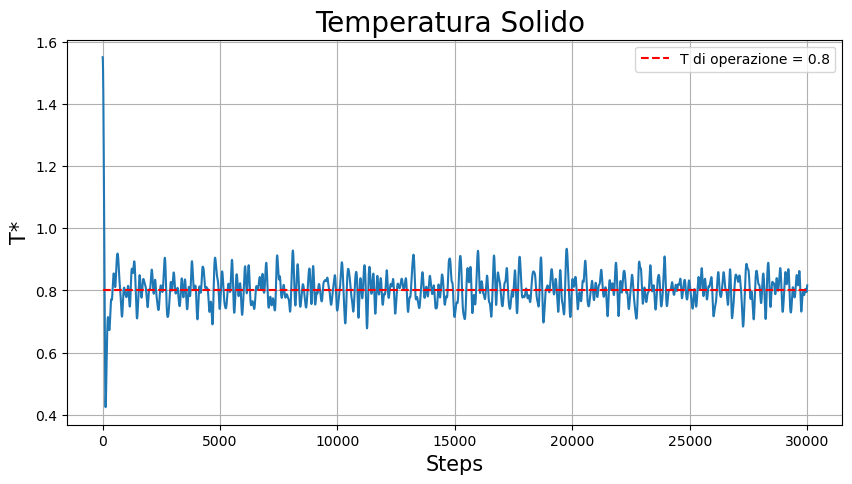

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =30000
x = np.arange(N)+1    
average = np.loadtxt("MD_MC/solido/equilibrio/output_temp_eq.dat", usecols=(2), unpack=True, delimiter=' ')
#second column cause we plot the average in each block and not the progressive average after 1block, 2blocks and so on
plt.figure(figsize=(10,5))
plt.plot(x,average)
plt.title('Temperatura Solido ', fontsize=20)
plt.grid(True)
plt.hlines(0.8, 0, 30000, colors='r', linestyles='dashed', label = "T di operazione = 0.8")
plt.xlabel('Steps', fontsize=15)
plt.ylabel('T*', fontsize=15)
plt.legend(fontsize="10")

plt.show()

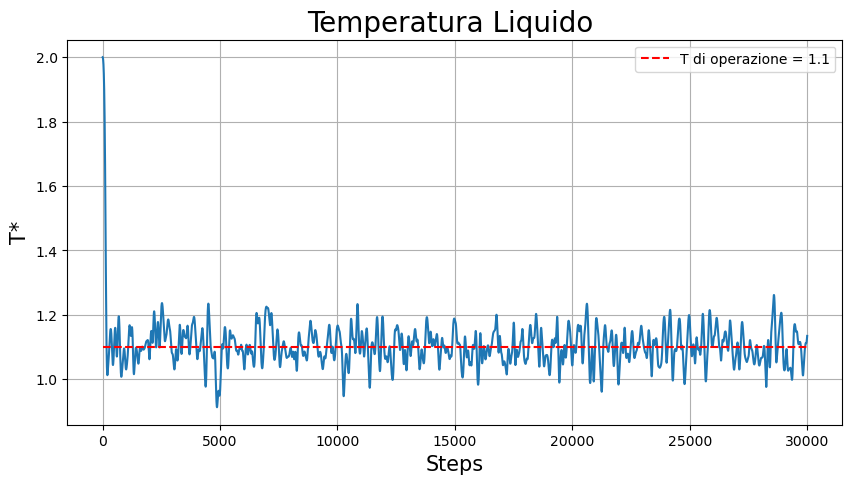

In [2]:
N =30000
x = np.arange(N)+1  
average = np.loadtxt("MD_MC/liquido/equilibrio/output_temp_eq.dat", usecols=(2), unpack=True, delimiter=' ')
plt.figure(figsize=(10,5))
plt.plot(x,average)
plt.title('Temperatura Liquido ', fontsize=20)
plt.grid(True)
plt.hlines(1.1, 0, 30000, colors='r', linestyles='dashed', label = "T di operazione = 1.1")
plt.xlabel('Steps', fontsize=15)
plt.ylabel('T*', fontsize=15)
plt.legend(fontsize='10')

plt.show()

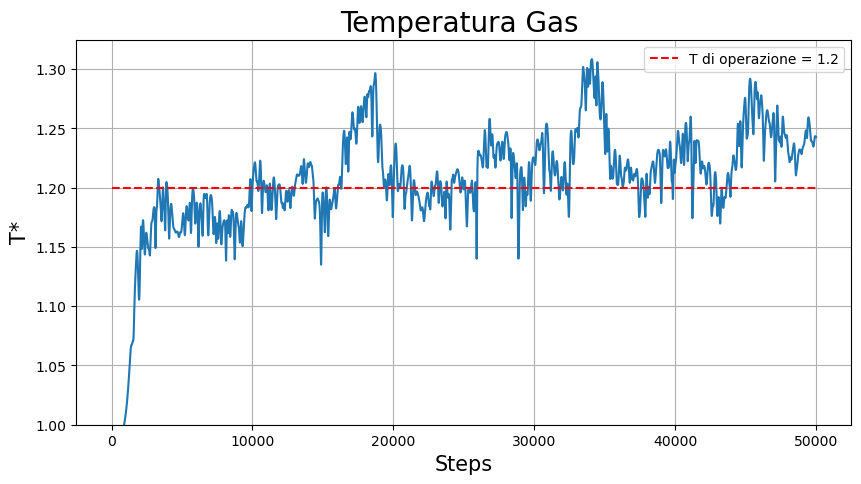

In [5]:
N = 50000
x = np.arange(N)+1   
average = np.loadtxt("MD_MC/gas/equilibrio/output_temp_eq.dat", usecols=(2), unpack=True, delimiter=' ')
plt.figure(figsize=(10,5))
plt.plot(x,average)
plt.title('Temperatura Gas ', fontsize=20)
plt.grid(True)
plt.hlines(1.2, 0, 50000, colors='r', linestyles='dashed', label = "T di operazione = 1.2")
plt.ylim(bottom=1.00)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('T*', fontsize=15)
plt.legend(fontsize='10')

plt.show()

## Esercizio 4.2

Ora che abbiamo implementato il calcolo della pressione attraverso il teorema del viriale e risolto il problema della equilibrizzazione del nostro sistema, possiamo finalmente procedere alla simulazione vera e propria. \
Vogliamo studiare un sistema di Argon, $\sigma = 0.34$ nm,  $\epsilon/k_B = 120$ K, $m=39.948$ amu, in 3 fasi differenti:
1. fase solida: $\rho^* = 1.1$ , $T_{iniziale}^* = 1.55$ , $r_c = 2.2$;
2. fase liquida: $\rho^* = 0.8$ , $T_{iniziale}^* = 2$ , $r_c = 2.5$;
3. fase gassosa: $\rho^* = 0.05$ , $T_{iniziale}^* = 0.98$ , $r_c = 5.0$.

Per tutte e tre le fasi mostriamo l'evoluzione del sistema plottando, in funzione del numero di blocchi, le medie progressive e le incertezze associate in unita' naturali di: 
- energia interna totale per particella $E/N$;
- energia potenziale per particella $U/N$' 
- energia cinetica per particella $K/N$; 
- temperatura $T$; 
- pressione $P$.

Per il calcolo utilizziamo il metodo a blocchi con 60 blocchi da 2000 step ognuno. 

### Fase Solida

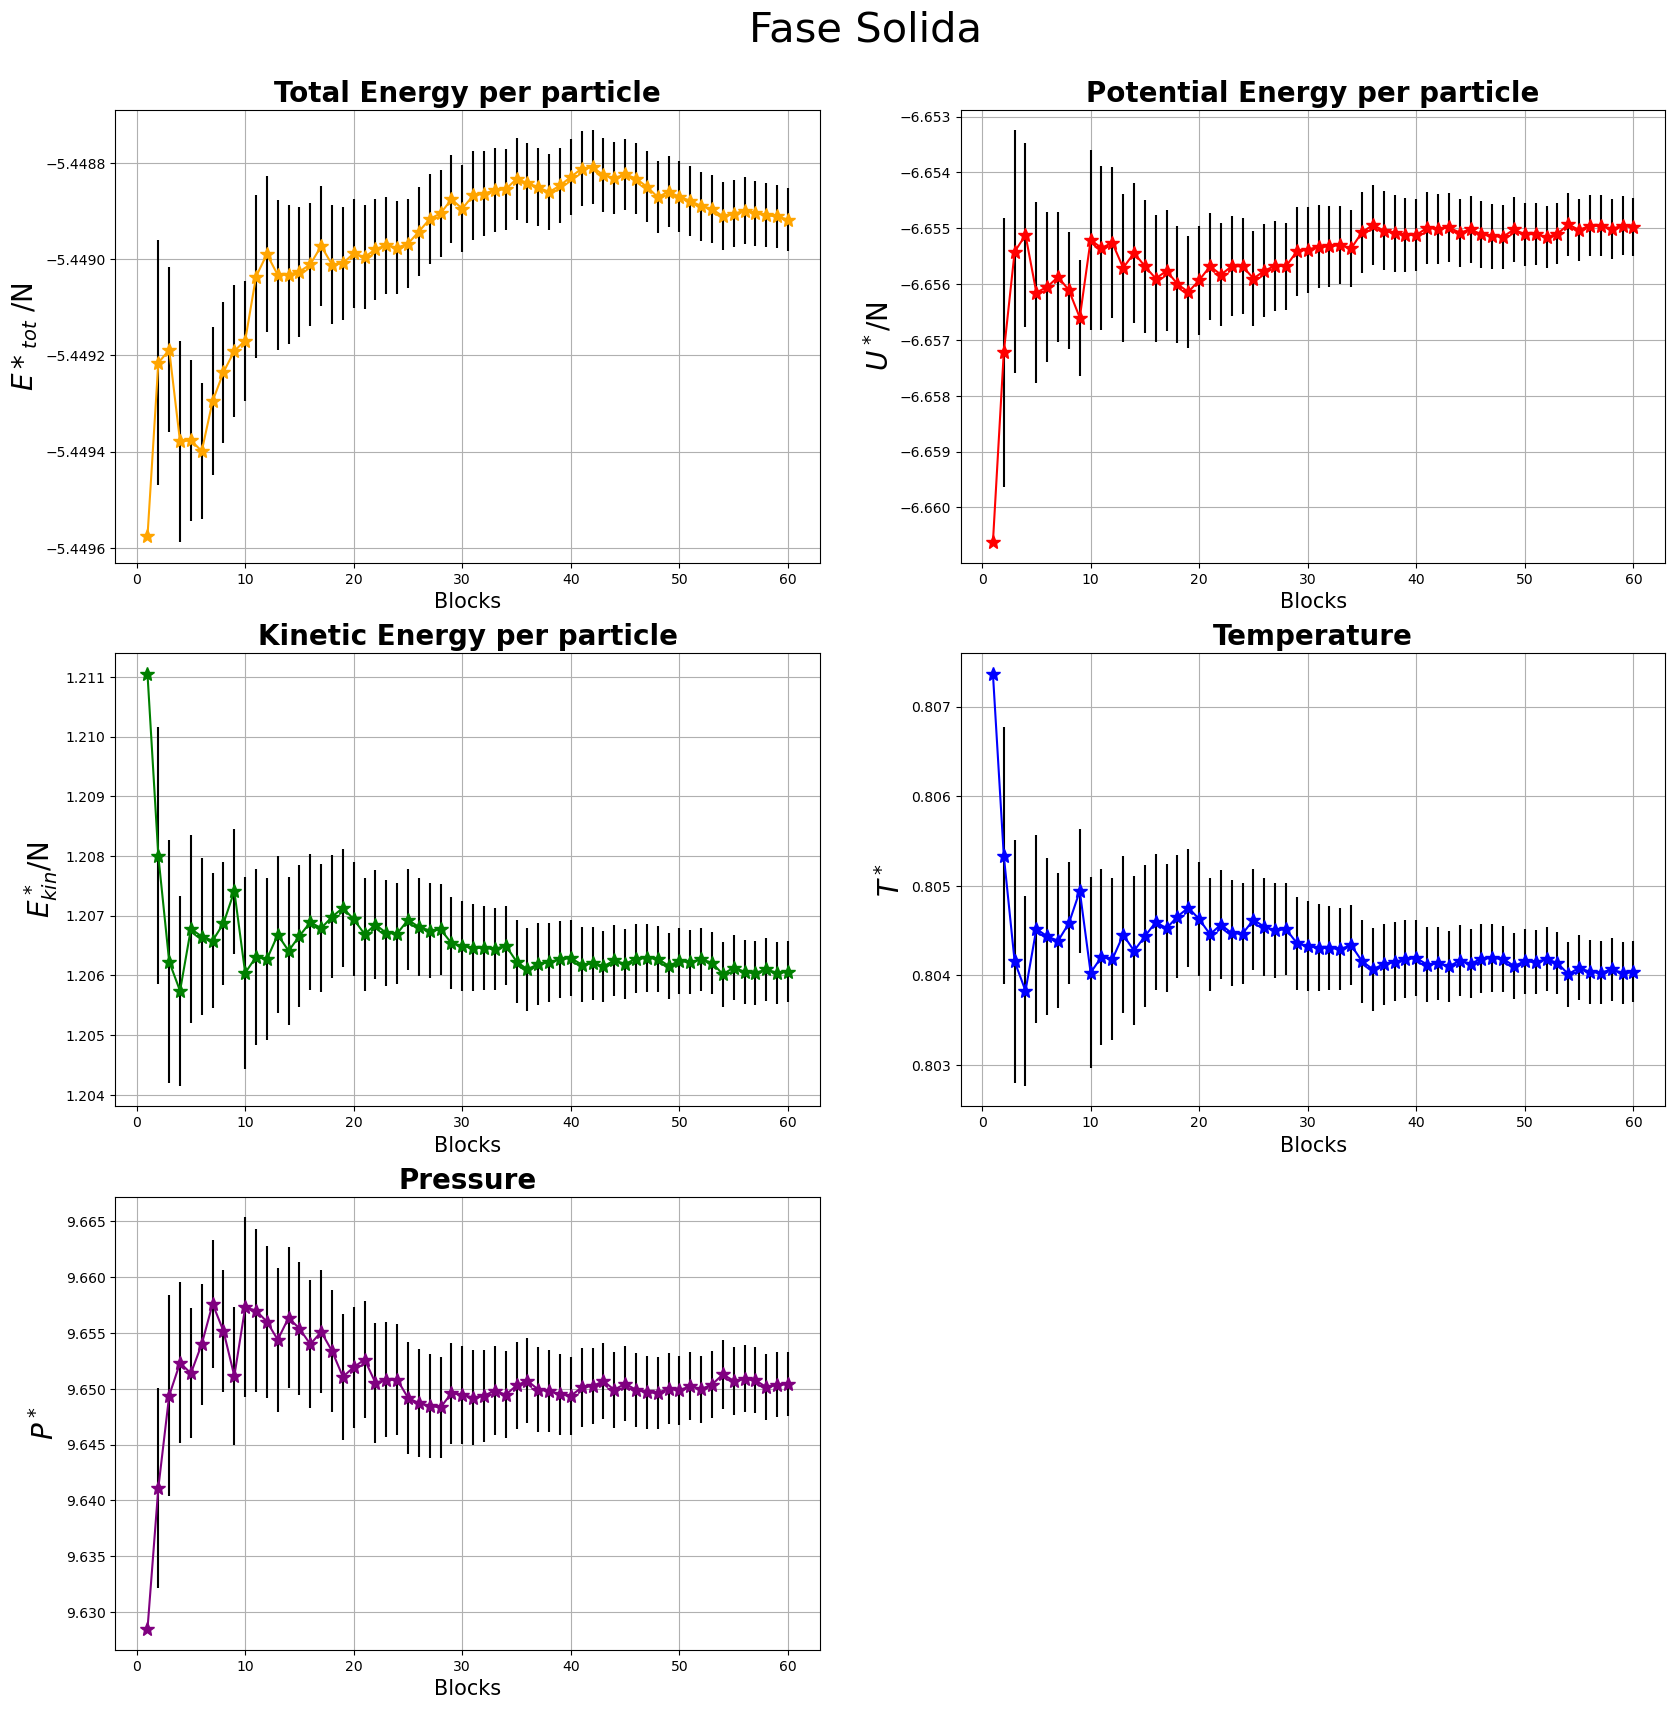

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =60
x = np.arange(N)+1 
plt.figure(figsize=(20,20))
colors = ['orange','red', 'green', 'blue', 'purple']
titles = ["Total Energy per particle", "Potential Energy per particle", "Kinetic Energy per particle", "Temperature",
         "Pressure"]
y_labels = [r"$E*_{tot}$ /N", r"$U^*$/N", r"$E^*_{kin}$/N", r"$T^*$", r"$P^*$"]
files_name = ["etot", "epot", "ekin", "temp", "pressure"]

for i in range(5):
    average, error = np.loadtxt("MD_MC/solido/output_"+files_name[i]+".dat", usecols = (3, 4), delimiter=' ',
                                unpack = True)
    plt.subplot(3, 2, i+1) #qui da mettere 3X2
    plt.errorbar(x, average, yerr=error, color= colors[i], ecolor ='black', marker = '*', markersize = '10') 
    plt.grid(True)
    plt.title(titles[i], fontweight='bold', fontsize = 20)
    plt.xlabel ("Blocks", fontsize =15)
    plt.ylabel (y_labels[i], fontsize =20)
    #if (i==0):
       # plt.ylim(-5.446, -5.453) #per vedere che rimane costante e siamo davvero in un ensemble microcanonico
    


plt.suptitle ("Fase Solida", fontsize =30, y=0.93)

plt.show()

Possiamo osservare come il sistema, una volta termalizzato, mantiene la temperatura target. Inoltre e' possibile imporre dei limiti sull'asse y del plot dell'energia totale, affinche' vari in un intervallo di grandezza simile alle altre due energie, cosi' da osservare che $E/N$ rimane pressoche' costante: cio' e' coerente col fatto che stiamo studiando un ensemble microcanico dove l'energia e' conservata.

### Fase Liquida

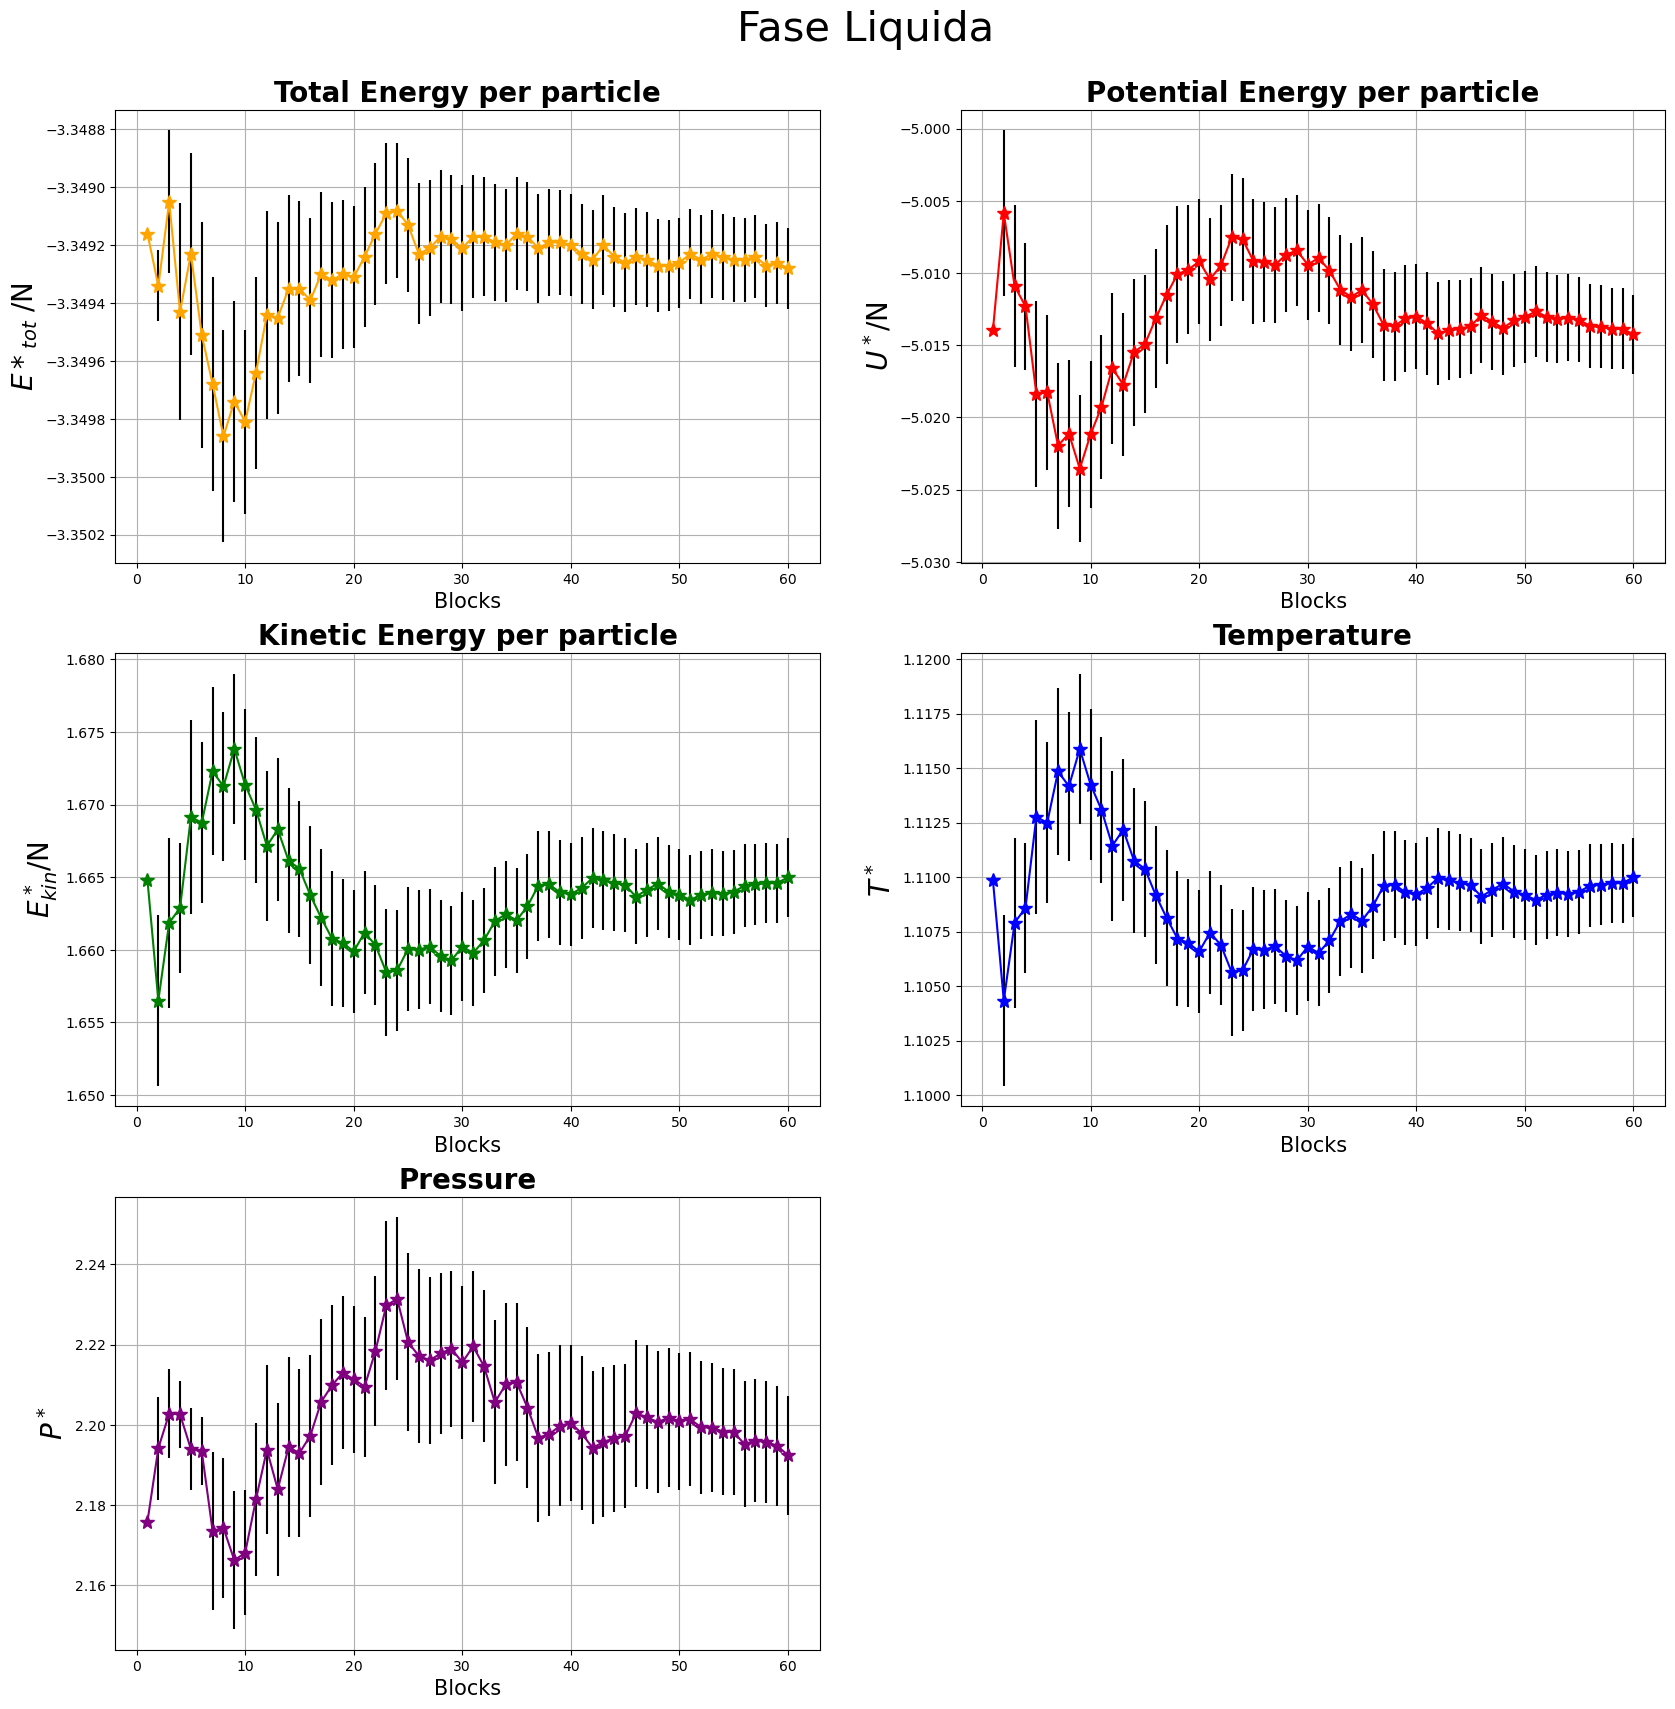

In [12]:
plt.figure(figsize=(20,20))
colors = ['orange','red', 'green', 'blue', 'purple']
titles = ["Total Energy per particle", "Potential Energy per particle", "Kinetic Energy per particle", "Temperature",
         "Pressure"]
y_labels = [r"$E*_{tot}$ /N", r"$U^*$/N", r"$E^*_{kin}$/N", r"$T^*$", r"$P^*$"]
files_name = ["etot", "epot", "ekin", "temp", "pressure"]

for i in range(5):
    average, error = np.loadtxt("MD_MC/liquido/output_"+files_name[i]+".dat", usecols = (3, 4), delimiter=' ',
                                unpack = True)
    plt.subplot(3, 2, i+1)
    plt.errorbar(x, average, yerr=error, color= colors[i], ecolor ='black', marker = '*', markersize = '10') 
    plt.grid(True)
    plt.title(titles[i], fontweight='bold', fontsize = 20)
    plt.xlabel ("Blocks", fontsize =15)
    plt.ylabel (y_labels[i], fontsize =20)
    #if (i==0):
     #   plt.ylim(-3.33, -3.36)


plt.suptitle ("Fase Liquida", fontsize =30, y=0.93)

plt.show()

Similmente a quanto notato per la fase solida, possiamo osservare come il sistema mantenga la temperatura di operazione e come $E/N$ rimanga pressoche' costante.

### Fase Gassosa

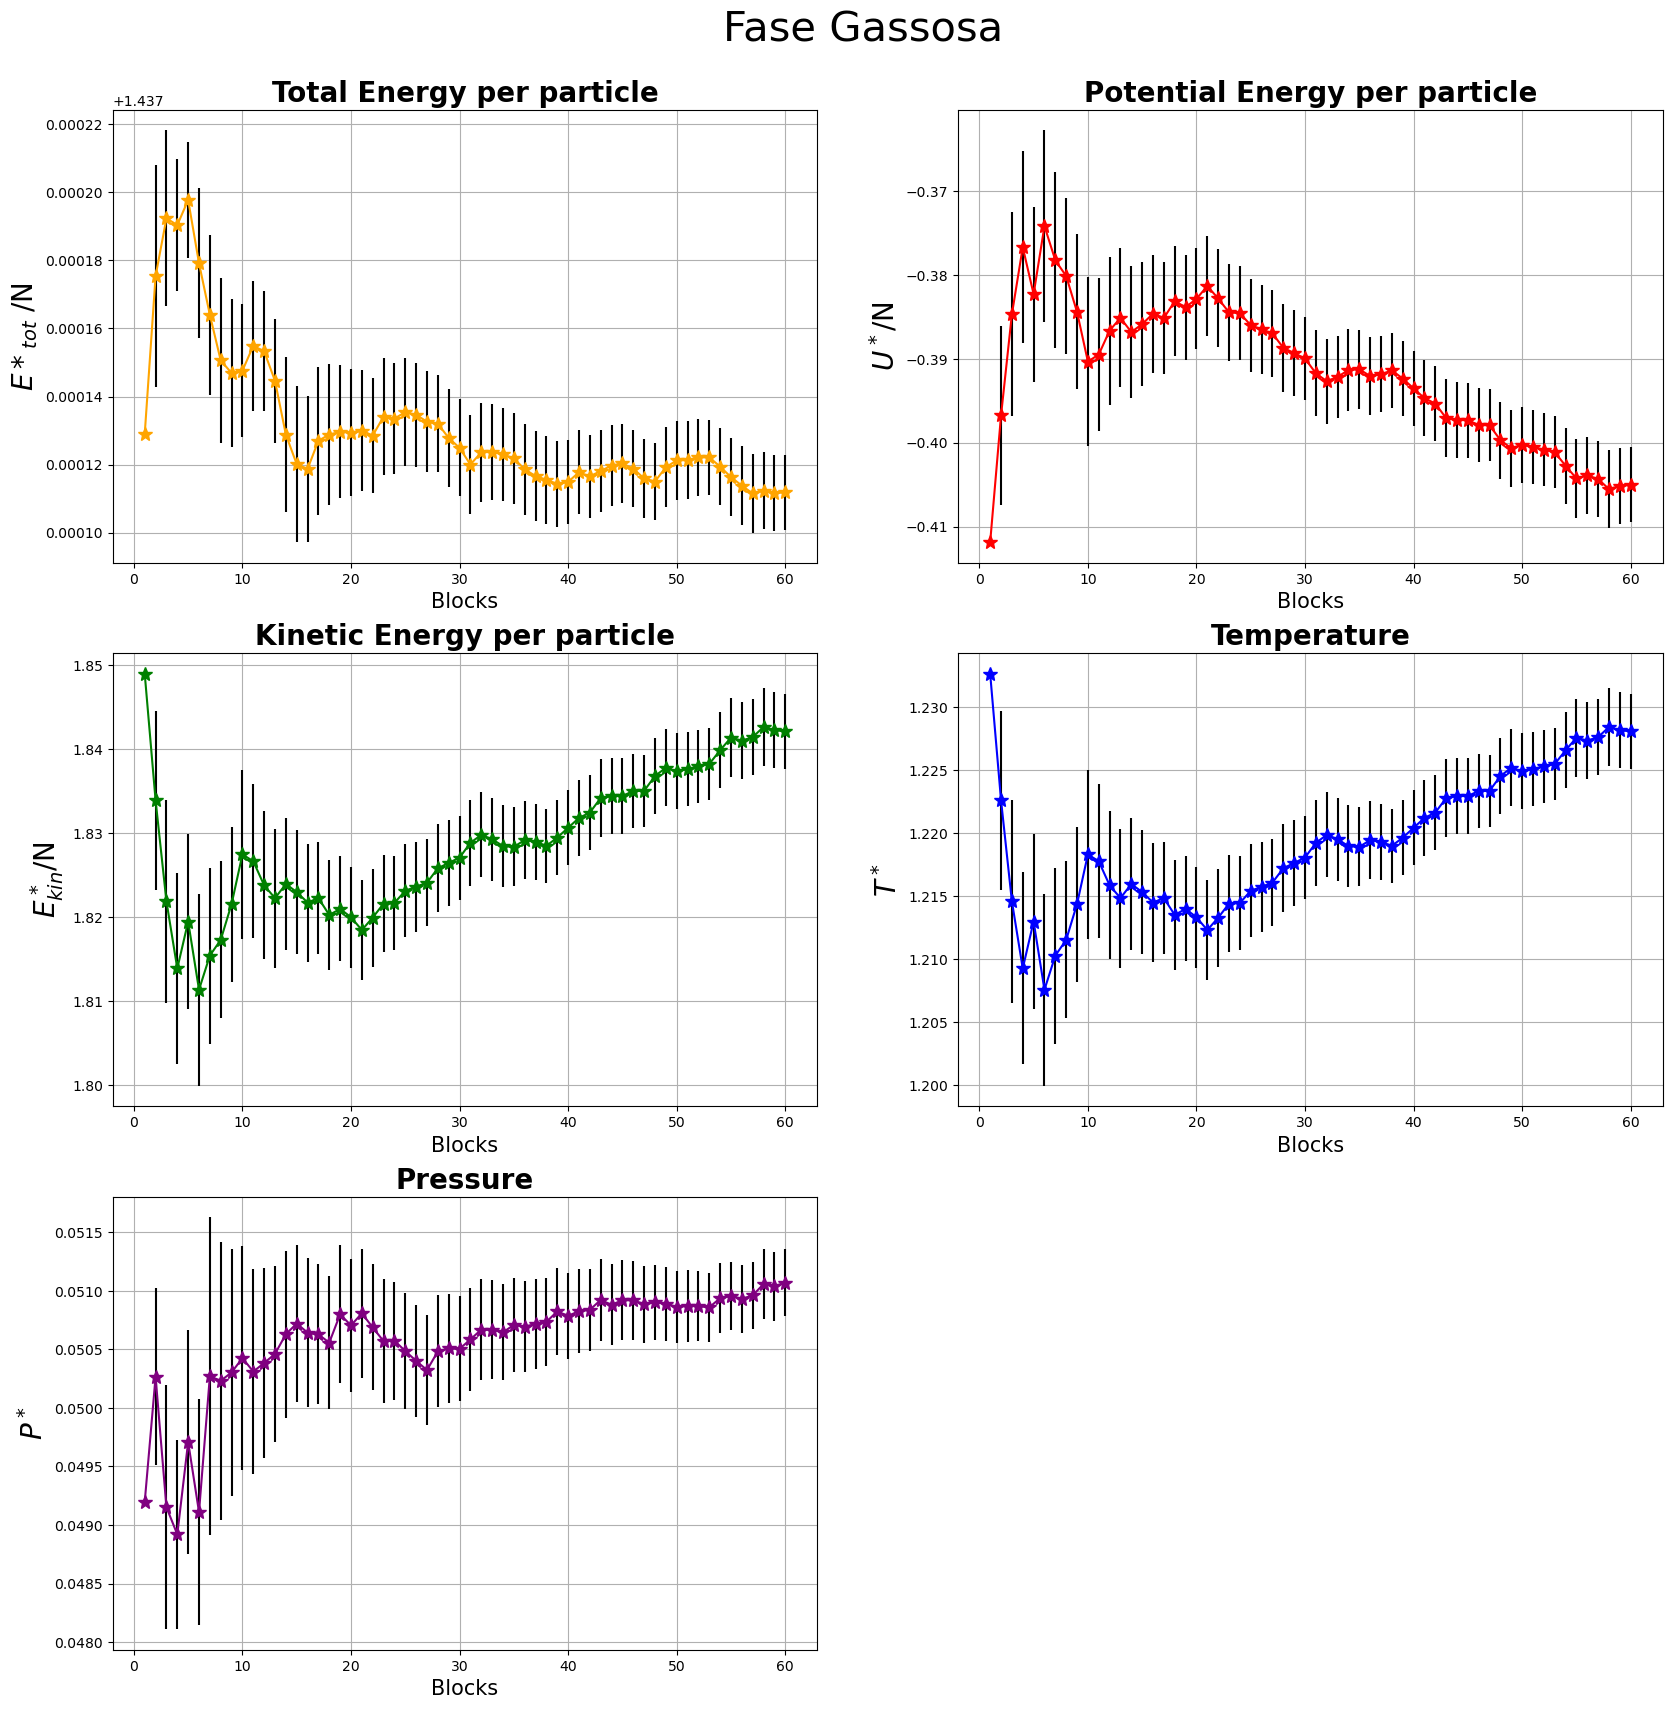

In [14]:
plt.figure(figsize=(20,20))
colors = ['orange','red', 'green', 'blue', 'purple']
titles = ["Total Energy per particle", "Potential Energy per particle", "Kinetic Energy per particle", "Temperature",
         "Pressure"]
y_labels = [r"$E*_{tot}$ /N", r"$U^*$/N", r"$E^*_{kin}$/N", r"$T^*$", r"$P^*$"]
files_name = ["etot", "epot", "ekin", "temp", "pressure"]

for i in range(5):
    average, error = np.loadtxt("MD_MC/gas/output_"+files_name[i]+".dat", usecols = (3, 4), delimiter=' ',
                                unpack = True)
    plt.subplot(3, 2, i+1)
    plt.errorbar(x, average, yerr=error, color= colors[i], ecolor ='black', marker = '*', markersize = '10') 
    plt.grid(True)
    plt.title(titles[i], fontweight='bold', fontsize = 20)
    plt.xlabel ("Blocks", fontsize =15)
    plt.ylabel (y_labels[i], fontsize =20)



plt.suptitle ("Fase Gassosa", fontsize =30, y=0.93)

plt.show()

Per osservare le oscillazioni nell'energia totale abbiamo dovuto riportare nel file di output otto cifre decimali al posto delle cinque di default. Riportandone solo cinque, infatti, il grafico sarebbe stato composto da valori costanti per diversi blocchi essendo la variazione piccolissima.
Possiamo, inoltre, vedere come la temperatura di operazione devii da quella a cui abbiamo cercato di equilibrare il sistema. Questo potrebbe essere causato dallo stesso effetto per cui il gas non riesce mai ad equilibrarsi totalmente, ma abbia delle spike crescenti nella temperatura che vengono riequilibrate in tempi, o step come possiamo vedere nell'equilibrizzazione del gas, lunghi. 